# Titanic Exercise

## Zhoumengdi Wang  ( zxw534 )

## 1. Load training data

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data_train = pd.read_csv("train.csv")
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 2. Check data

In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We can see that, there are 12 values,9 of them are  complete.  
There are two data missed in Embarked.  
There are more than 100 data missed in Age.  
There are only 204 data in Cabin.

In [3]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


According to this result, the mean of survived is 0.383838, that means most of passengers were not survived.  
And the mean of Pclass is 2.308642, this means 3-class has more passengers.  
The mean of Age is 29.699118, we can find that there were many kids on the ship.

## 3.  Data analysis

### The distribution of each attribute

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(12, 12)

plt.subplot2grid((2,2),(0,0))  
data_train.Survived.value_counts().plot(kind='bar')
plt.title('Survived (1 means survived)')
plt.ylabel('Number of people')  

plt.subplot2grid((2,2),(0,1))  
data_train.Pclass.value_counts().plot(kind="bar")
plt.title('Class of passengers')
plt.ylabel('Number of people')


plt.subplot2grid((2,2),(1,0))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title('Embarked')
plt.ylabel('Number of people')

plt.subplot2grid((2,2),(1,1))
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   # plot(kind='kde')  means density
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.title('The distribution of age in different classes')
plt.xlabel('Age')
plt.ylabel('Density') 
plt.legend(('First Class','Second Class','Third Class'),loc='best')

plt.show()

<Figure size 1200x1200 with 4 Axes>

We can find:  
(1) The non-survived passengers are more than half.  
(2) Most passengers were in third class.  
(3) According to that most people boarded on S embarked, we can speculate that S embarked is the common embarked.     The other embarked are high-level embarked.  
(4) The higher level class, the older passengers.  

## The relationship between survived and other attributes

### The relationship between survived and age

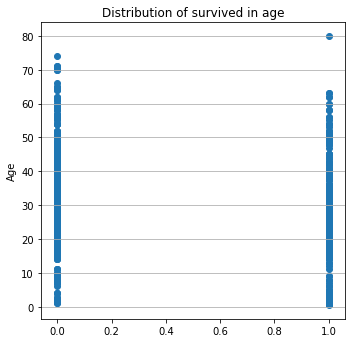

In [5]:
fig = plt.figure()
fig.set_size_inches(12, 12)

plt.subplot2grid((2,2),(0,0))
plt.scatter(data_train.Survived, data_train.Age)
plt.title('Distribution of survived in age')
plt.ylabel('Age')  
plt.grid(b=True, which='major', axis='y') 

plt.show()

Well, there are passengers of all ages who were survived.  
Even though there are no passengers were survived in 65-70, that may because these ages are high and the passengers in these age are few. 

### The relationship between survived and class

In [6]:
fig = plt.figure()

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({'survived':Survived_1, 'non-survived':Survived_0})

<Figure size 432x288 with 0 Axes>

In [7]:
df

,survived,non-survived
1,136,80
2,87,97
3,119,372


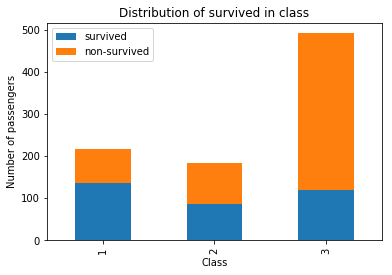

In [8]:
df.plot(kind='bar', stacked=True)
plt.title('Distribution of survived in class')
plt.xlabel('Class') 
plt.ylabel('Number of passengers') 
plt.show()

The higher class, the more chances to get rescued, well, rich people always be rescued firstly in that time.

### The relationship between survived and sex

<Figure size 432x288 with 0 Axes>

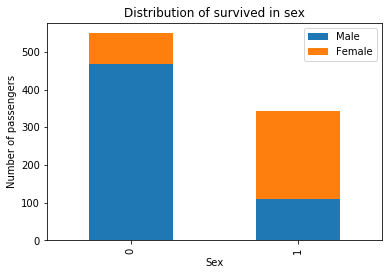

In [9]:
fig = plt.figure()

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({'Male':Survived_m, 'Female':Survived_f})
df.plot(kind='bar', stacked=True)

plt.title('Distribution of survived in sex')
plt.xlabel('Sex') 
plt.ylabel('Number of passengers')
plt.show()

The probability of female get recused is much higher than male, of course, Lady First.

### The relationship between survived and ( class , sex)

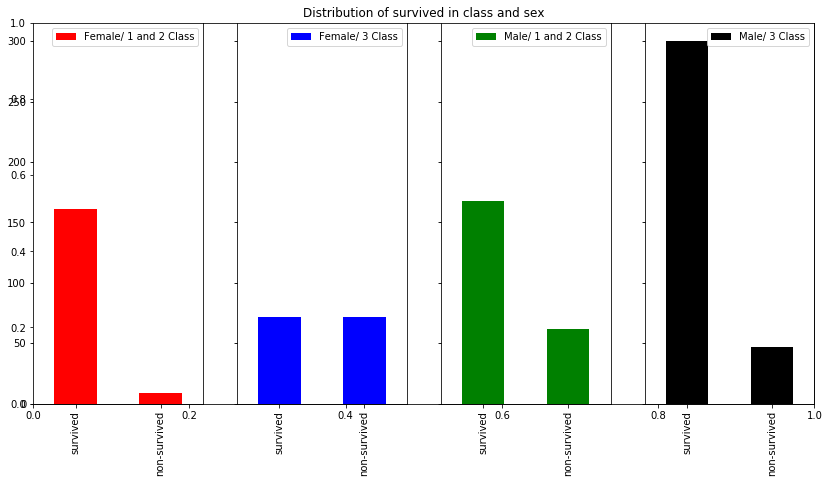

In [10]:
fig=plt.figure()
fig.set_size_inches(14, 7)
plt.title('Distribution of survived in class and sex')

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='red')
ax1.set_xticklabels(['survived','non-survived'])
ax1.legend(['Female/ 1 and 2 Class'])

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='blue')
ax2.set_xticklabels(['survived','non-survived'])
plt.legend(['Female/ 3 Class'])

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='green')
ax3.set_xticklabels(['survived','non-survived'])
plt.legend(['Male/ 1 and 2 Class'])

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='black')
ax4.set_xticklabels(['survived','non-survived'])
plt.legend(['Male/ 3 Class'])

plt.show()

Obviously, female in first and second class had very high probability of getting rescued.  
However, no matter female or male, passengers in third class all has lower probability of gerring rescued.

### The relationship between survived and embarked

<Figure size 432x288 with 0 Axes>

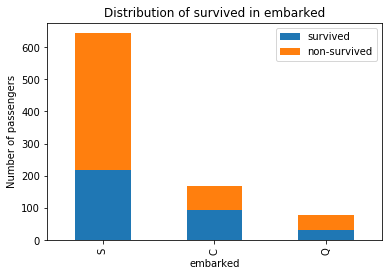

In [11]:
fig = plt.figure()

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({'survived':Survived_1, 'non-survived':Survived_0})
df.plot(kind='bar', stacked=True)

plt.title('Distribution of survived in embarked')
plt.xlabel('embarked') 
plt.ylabel('Number of passengers')
plt.show()

C embarked looks like had little higher probability of getting rescued.

## 4. Data preprocessing

### Take care of missing data

Because there are many data missed in Cabin and Age, I decided to process these two kinds data firstly.

For cabin, we can use 'yes' or 'no' to label them. 

For age, I decide to use a method I found in website. The author of the method used RandomForest to fit the missed data.

In [12]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\smwms\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [13]:
## Using RandomForest to fill in the missed data.
def set_missing_ages(df):

    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # Divide passengers into two parts: known age and unknow age
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    y = known_age[:, 0]

    X = known_age[:, 1:]

    randomforestregressor = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    randomforestregressor.fit(X, y)

    predictedAges = randomforestregressor.predict(unknown_age[:, 1:])
    
    df.loc[df.Age.isnull(), 'Age'] = predictedAges 

    return df, randomforestregressor

In [14]:
data_train, randomforestregressor = set_missing_ages(data_train)

In [15]:
def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

In [16]:
data_train = set_Cabin_type(data_train)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


### Encoding categorical data

In the data, there are some kinds features are not number, it will cause error in logistic regression.  
So I want to chage these features into number features.  
The method is using binary rules (onehotcoder)  
For example, there are two kinds embarked: C,Q and S, now I relabel them into [1,0,0],[0,1,0] and [0,0,1]

In [17]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')
dummies_Cabin

,Cabin_No,Cabin_Yes
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,1,0
8,1,0
9,1,0


In [18]:
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

In [19]:
df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,1,0,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,0,1,1,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,1,0,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,0,1,0,0,1,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,1,0,0,0,1,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,...,1,0,0,1,0,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,...,0,1,0,0,1,0,1,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,...,1,0,0,0,1,0,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,...,1,0,0,0,1,1,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,...,1,0,1,0,0,1,0,0,1,0


In [20]:
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


###  Feature Scaling

Because the range of age and fare are large, so let's do feature scaling. 

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1, 1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1, 1))
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1,-0.426384,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0,1.787722,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029569,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194333,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0,-1.148655,-0.042956


## 5. Logistic Regression

### Generate model

In [22]:
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

In [23]:
train_df

,Survived,SibSp,Parch,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,0,1,0,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,1,1,0,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,1,0,0,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,1,1,0,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,0,0,0,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
5,0,0,0,1,0,0,1,0,0,1,0,0,1,-0.426384,-0.478116
6,0,0,0,0,1,0,0,1,0,1,1,0,0,1.787722,0.395814
7,0,3,1,1,0,0,0,1,0,1,0,0,1,-2.029569,-0.224083
8,1,0,2,1,0,0,0,1,1,0,0,0,1,-0.194333,-0.424256
9,1,1,0,1,0,1,0,0,1,0,0,1,0,-1.148655,-0.042956


In [24]:
train_np = train_df.as_matrix()
train_np

array([[ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.56138008, -0.50244517],
       [ 1.        ,  1.        ,  0.        , ...,  0.        ,
         0.61317075,  0.78684529],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.26774237, -0.48885426],
       ...,
       [ 0.        ,  1.        ,  2.        , ...,  1.        ,
        -0.98759887, -0.17626324],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.26774237, -0.04438104],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.17271419, -0.49237783]])

In [25]:
# y is the dependent variable
y = train_np[:, 0]

# x is the  independent variables
X = train_np[:, 1:]

In [26]:
# fit into the model
classifier = linear_model.LogisticRegression(random_state = 0)
classifier.fit(X, y)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Data preprocessing in test data

In [27]:
data_test = pd.read_csv("test.csv")
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [28]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [29]:
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0

In [30]:
# use the same regressor to predict 
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()

X = null_age[:, 1:]
predictedAges = randomforestregressor.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

In [31]:
data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')

In [32]:
df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1, 1))
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1, 1))
df_test

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740
5,897,14.000000,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248380,-0.471623
6,898,30.000000,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.034018,-0.500221
7,899,26.000000,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337609,-0.117238
8,900,18.000000,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944790,-0.507390
9,901,21.000000,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717097,-0.204154


## 6. Predict 

In [33]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = classifier.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [34]:
result.to_csv("predicted_result.csv", index=False)

In this exercise, I learned a lot.  
Firstly, there is basic process of data analysis: checking the data, finding the relationship in the data, prepressing data and choosing an appropriate model and fit data with the model. All steps are important.  
Checking data: we have to know what the data is, what values or features does data has. According to this step, we can also find if there are some data missed. And we can find the statistical attributes of data(e.g mean,min, max... )  
Secondly, we have to find the relationship in the data. Because we want generate a model for the data, we have to know the relationship between dependt variables and each independt variances. After this step, we will know the relationships, this step will help lot in choosing model. For me, I think I found a lot of fun in this part, I output many relationships between survived and other features. I found these relationships tell me some phenomenons: (1) more rich passengers has higher probability of getting rescued, this matches the society at that time. Nobility conctrol the world, of course, they control the rank of getting rescued. (2) ladies has higher probability of getting rescued, because of the "Lady First" rule. Well, there were many gentlemans on the ship. And these gentlemans sacrificed their lifes. It is heart-warming.  
The third part is prepressing data, we cannot input original data into model directly, because there are many problems in the data, for example, the type of features. Most dataset not only have value type data but also have string type data. In this case, we need to unify all types data into value type. And because of the practical meaning of each feature, the ranges of each feature are different, an very important thing is feature scaling.  
The last part is generating a model, fitting the data by model and predicting the test data. This part is the core part in the hole process, but there won't be a good result without finishing the previous steps. 